In [113]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize

# Fit SVM and tune parameters

## Linearly separable dataset

In [114]:
# import Linearly separable dataset
linear_Xtrain = pd.read_csv('linearDataset/Xtrain.csv', header = None)
linear_Xtest = pd.read_csv('linearDataset/Xtest.csv', header = None)
linear_labelsTrain = pd.read_csv('linearDataset/labelsTrain.csv', header = None).values.ravel()
linear_labelsTest = pd.read_csv('linearDataset/labelsTest.csv', header = None).values.ravel()

### Visualization of the dataset

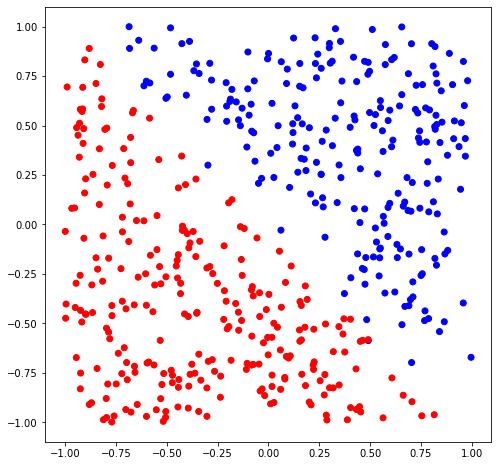

In [115]:
x1 = linear_Xtrain.iloc[:, 0]
x2 = linear_Xtrain.iloc[:, 1]
label = linear_labelsTrain
colors = ['red', 'blue']
label_name = ['0', '1']
fig = plt.figure(figsize=(8, 8))
plt.scatter(x1, x2, c = label, cmap = mpl.colors.ListedColormap(colors))

### Comment on selection of kernels

The decision boundary looks linear.

### Cross validation to tune parameter C

In [116]:
clf_linear = svm.SVC(kernel = 'linear')
C_range = np.logspace(1, 5, 5)
param_grid = dict(C = C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

clf_poly = GridSearchCV(estimator=clf_linear, param_grid=param_grid, cv = cv)
clf_poly.fit(linear_Xtrain, linear_labelsTrain)        
print(clf_poly.best_score_)                                  
print(clf_poly.best_estimator_.C)  

0.992
100.0


There is some space between the two classes, which is probably why the optimal parameter C is smaller than that in the previous case.

### Retrain the model on the training set and fit it on the training set and validation set

In [117]:
clf_linear = svm.SVC(kernel = 'linear', C = 100)
clf_linear.fit(linear_Xtrain, linear_labelsTrain)
print(clf_linear.score(linear_Xtrain, linear_labelsTrain))
print(clf_linear.score(linear_Xtest, linear_labelsTest))

0.996
0.994


The performance on the test set is slightly worse than that on the train set.

### Visualization of scores on the parameter grid

In [118]:
scores_train = np.ones((len(C_range), 1))
scores_test = np.ones((len(C_range), 1))
for i, C in enumerate(C_range):
        clf_linear = svm.SVC(kernel = 'linear', C = C)
        clf_linear.fit(linear_Xtrain, linear_labelsTrain)
        scores_train[i][0] = clf_poly.score(linear_Xtrain, linear_labelsTrain)
        scores_test[i][0] = clf_poly.score(linear_Xtest, linear_labelsTest)

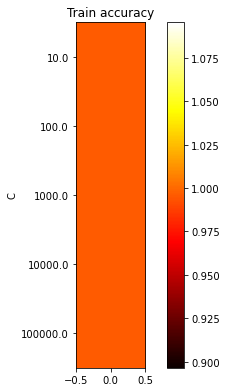

In [119]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores_train, interpolation='nearest', cmap=plt.cm.hot)
#plt.xlabel('degree')
plt.ylabel('C')
plt.colorbar()
#plt.xticks(np.arange(len(d_range)), d_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Train accuracy')
plt.show()

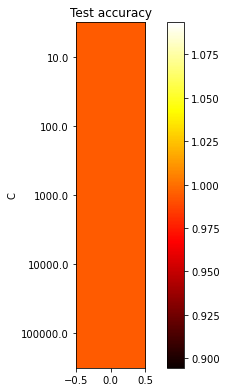

In [120]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores_test, interpolation='nearest', cmap=plt.cm.hot)
#plt.xlabel('degree')
plt.ylabel('C')
plt.colorbar()
#plt.xticks(np.arange(len(d_range)), d_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Test accuracy')
plt.show()

## Checkerboard dataset

In [121]:
# import Checkboard Dataset
checkerboard_Xtrain = pd.read_csv('checkerboardDataset/Xtrain.csv', header = None)
checkerboard_Xtest = pd.read_csv('checkerboardDataset/Xtest.csv', header = None)
checkerboard_labelsTrain = pd.read_csv('checkerboardDataset/labelsTrain.csv', header = None).values.ravel()
checkerboard_labelsTest = pd.read_csv('checkerboardDataset/labelsTest.csv', header = None).values.ravel()

### Visualization of the dataset

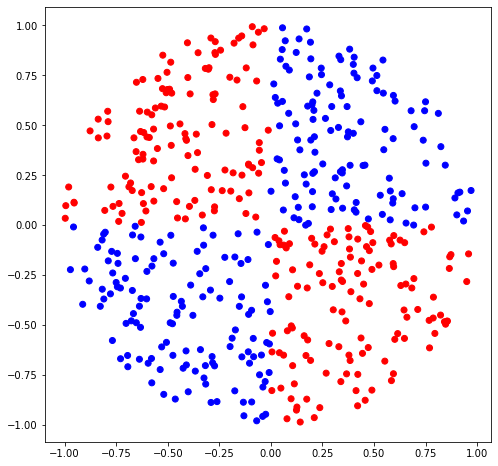

In [122]:
x1 = checkerboard_Xtrain.iloc[:, 0]
x2 = checkerboard_Xtrain.iloc[:, 1]
label = checkerboard_labelsTrain
colors = ['red', 'blue']
label_name = ['0', '1']
fig = plt.figure(figsize=(8, 8))
plt.scatter(x1, x2, c = label, cmap = mpl.colors.ListedColormap(colors))

### Comment on selection of kernels

In my opinion, there cannot be a single linear boundary. Therefore both Gaussian RBF and Polynomial kernels can be used in this case. Here we use Polynomial kernel.

### Cross validation to tune parameters C, d

In [123]:
clf_poly = svm.SVC(kernel = 'poly')
C_range = np.logspace(1, 5, 5)
d_range = np.arange(1, 4)
param_grid = dict(C = C_range, degree = d_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

clf_poly = GridSearchCV(estimator=clf_poly, param_grid=param_grid, cv = cv, scoring='f1')
clf_poly.fit(checkerboard_Xtrain, checkerboard_labelsTrain)        
print(clf_poly.best_score_)                                  
print(clf_poly.best_estimator_.C)
print(clf_poly.best_estimator_.degree)     

0.997979797979798
100000.0
2


The result that the optimal C is very large is due to the fact that the two classes almost never overlap, which means there is almost no point for having a soft margin.

### Retrain the model on the training set and fit it on the training set and validation set

In [124]:
clf_poly = svm.SVC(kernel = 'poly', degree = 2, C = 100000)
clf_poly.fit(checkerboard_Xtrain, checkerboard_labelsTrain)
print(clf_poly.score(checkerboard_Xtrain, checkerboard_labelsTrain))
print(clf_poly.score(checkerboard_Xtest, checkerboard_labelsTest))

1.0
0.996


The performance on the test set is slightly worse than that of the training set.

### Visualization of scores on the parameter grid

In [125]:
# Auxilary method
# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [126]:
scores_train = np.ones((len(C_range), len(d_range)))
scores_test = np.ones((len(C_range), len(d_range)))
for i, C in enumerate(C_range):
    for j, d in enumerate(d_range):
        clf_poly = svm.SVC(kernel = 'poly', C = C, degree = d)
        clf_poly.fit(checkerboard_Xtrain, checkerboard_labelsTrain)
        scores_train[i][j] = clf_poly.score(checkerboard_Xtrain, checkerboard_labelsTrain)
        scores_test[i][j] = clf_poly.score(checkerboard_Xtest, checkerboard_labelsTest)

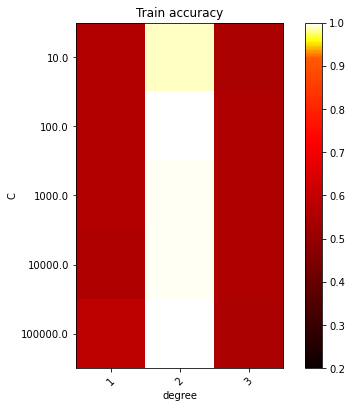

In [127]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores_train, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('degree')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(d_range)), d_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Train accuracy')
plt.show()

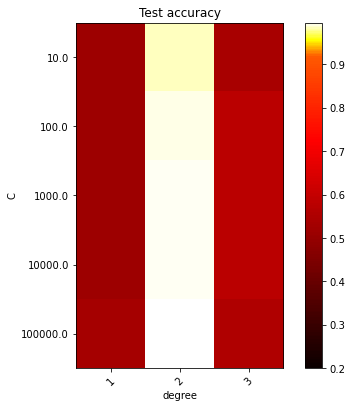

In [128]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores_test, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('degree')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(d_range)), d_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Test accuracy')
plt.show()

## Ripley dataset

In [130]:
# import Ripley dataset
ripley_Xtrain = pd.read_csv('RipleyDataset/Xtrain.csv', header = None)
ripley_Xtest = pd.read_csv('RipleyDataset/Xtest.csv', header = None)
ripley_labelsTrain = pd.read_csv('RipleyDataset/labelsTrain.csv', header = None).values.ravel()
ripley_labelsTest = pd.read_csv('RipleyDataset/labelsTest.csv', header = None).values.ravel()

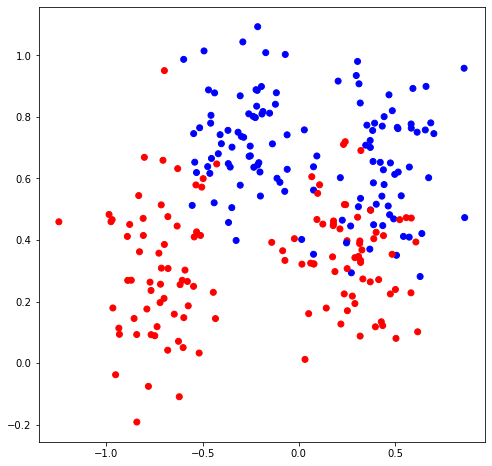

In [131]:
x1 = ripley_Xtrain.iloc[:, 0]
x2 = ripley_Xtrain.iloc[:, 1]
label = ripley_labelsTrain
colors = ['red', 'blue']
label_name = ['0', '1']
fig = plt.figure(figsize=(8, 8))
plt.scatter(x1, x2, c = label, cmap = mpl.colors.ListedColormap(colors))

### Comment on selection of kernels

I would choose Gaussian RBF kernel for this case.

### Cross validation to tune parameters C, gamma

In [132]:
clf_rbf = svm.SVC(kernel = 'rbf')
C_range = np.logspace(1, 5, 5)
g_range = np.linspace(0.1, 2, num=10)
param_grid = dict(C = C_range, gamma = g_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

clf_rbf = GridSearchCV(estimator=clf_rbf, param_grid=param_grid, cv = cv)
clf_rbf.fit(ripley_Xtrain, ripley_labelsTrain)        
print(clf_rbf.best_score_)                                  
print(clf_rbf.best_estimator_.C)
print(clf_rbf.best_estimator_.gamma)     

0.868
1000.0
0.7333333333333333


### Retrain the model on the training set and fit it on the training set and validation set

In [133]:
clf_rbf = svm.SVC(kernel = 'rbf', gamma = 0.7333333333333333, C = 1000)
clf_rbf.fit(ripley_Xtrain, ripley_labelsTrain)
print(clf_rbf.score(ripley_Xtrain, ripley_labelsTrain))
print(clf_rbf.score(ripley_Xtest, ripley_labelsTest))

0.892
0.898


The performance on the test set is slightly better than that on the train set.

### Visualization of scores on the parameter grid

In [134]:
scores_train = np.ones((len(C_range), len(g_range)))
scores_test = np.ones((len(C_range), len(g_range)))
for i, C in enumerate(C_range):
    for j, g in enumerate(g_range):
        clf_poly = svm.SVC(kernel = 'rbf', C = C, gamma = g)
        clf_poly.fit(ripley_Xtrain, ripley_labelsTrain)
        scores_train[i][j] = clf_poly.score(ripley_Xtrain, ripley_labelsTrain)
        scores_test[i][j] = clf_poly.score(ripley_Xtest, ripley_labelsTest)

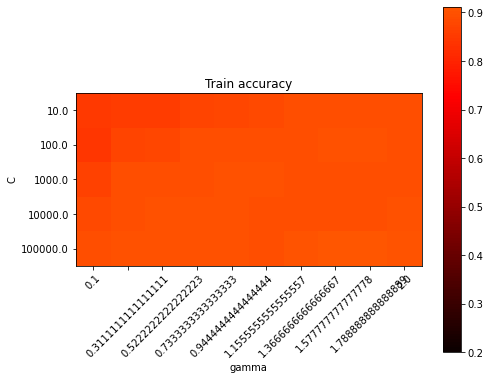

In [135]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores_train, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(g_range)), g_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Train accuracy')
plt.show()

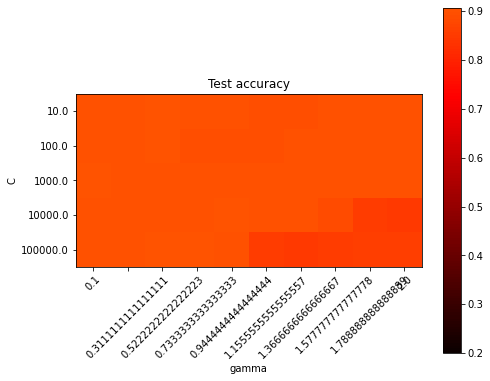

In [136]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores_test, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(g_range)), g_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Test accuracy')
plt.show()

# Nested cross validation for model comparison on the checkerboard dataset

## Polynomial kernel

In [137]:
clf_poly = svm.SVC(kernel = 'poly')
C_range = np.logspace(1, 5, 5)
d_range = np.arange(1, 4)
param_grid = dict(C = C_range, degree = d_range)

In [138]:
inner_cv = KFold(n_splits=4, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=42)

clf_poly = GridSearchCV(estimator=clf_poly, param_grid=param_grid, cv=inner_cv)
nested_score = cross_val_score(clf_poly, X=checkerboard_Xtrain, y=checkerboard_labelsTrain, cv=outer_cv)
nested_scores = nested_score.mean()

In [139]:
nested_scores

0.998

## RBF kernel

In [140]:
clf_rbf = svm.SVC(kernel = 'rbf')
C_range = np.logspace(1, 5, 5)
g_range = np.linspace(0.1, 1, num=10)
param_grid = dict(C = C_range, gamma = g_range)

In [141]:
inner_cv = KFold(n_splits=4, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=42)

clf_poly = GridSearchCV(estimator=clf_rbf, param_grid=param_grid, cv=inner_cv)
nested_score = cross_val_score(clf_poly, X=checkerboard_Xtrain, y=checkerboard_labelsTrain, cv=outer_cv)
nested_scores = nested_score.mean()

In [142]:
nested_scores

0.982

## Conclusion

The polynomial kernel performs slightly better